<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 154.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 177.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 161.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 129.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 146.1 MB/s eta 0:00:00


#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




In [3]:
df['Age'].unique()

<StringArray>
['Under 18 years old',    '35-44 years old',    '45-54 years old',
    '18-24 years old',    '25-34 years old',    '55-64 years old',
  'Prefer not to say',  '65 years or older']
Length: 8, dtype: str

In [6]:
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['Age_numeric'] = df['Age'].map(age_map)

In [5]:
df['JobSatPoints_6'].isnull().sum()

np.int64(35987)

In [7]:
median_jobsat = df['JobSatPoints_6'].median()
df['JobSatPoints_6'] = df['JobSatPoints_6'].fillna(median_jobsat)



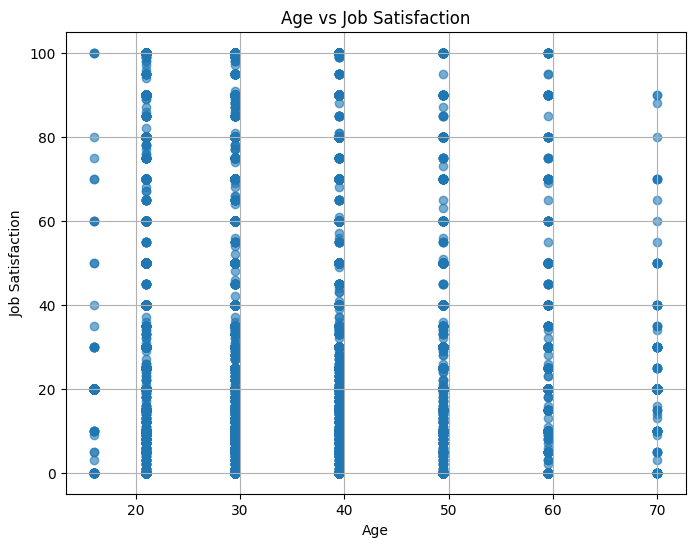

In [8]:
# 1. إنشاء عمود رقمي يمثل العمر بناءً على الفئات
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['Age_numeric'] = df['Age'].map(age_map)

# 2. تنظيف JobSatPoints_6 بالوسيط
median_jobsat = df['JobSatPoints_6'].median()
df['JobSatPoints_6'] = df['JobSatPoints_6'].fillna(median_jobsat)

# 3. إزالة الصفوف التي لا تحتوي على Age_numeric
df_clean = df.dropna(subset=['Age_numeric'])

# 4. استخدام Age_numeric مباشرة للرسم أو التحليل
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df_clean['Age_numeric'], df_clean['JobSatPoints_6'], alpha=0.6)
plt.title('Age vs Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.grid(True)
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


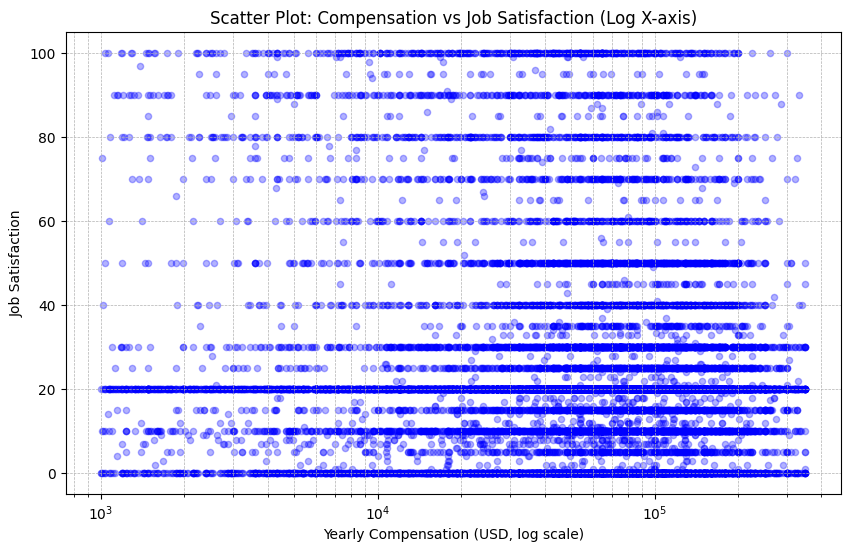

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. تنظيف JobSatPoints_6 ---
median_jobsat = df['JobSatPoints_6'].median()
df['JobSatPoints_6'] = df['JobSatPoints_6'].fillna(median_jobsat)

# --- 2. إزالة القيم المفقودة في الأعمدة المهمة ---
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# --- 3. إزالة الرواتب الشاذة والمنطقية ---
df_clean = df_clean[(df_clean['ConvertedCompYearly'] >= 1000) & 
                    (df_clean['ConvertedCompYearly'] <= 1_000_000)]

# --- 4. إزالة أعلى 1٪ لتقليل ضغط الرسم ---
upper_limit = df_clean['ConvertedCompYearly'].quantile(0.99)
df_clean_filtered = df_clean[df_clean['ConvertedCompYearly'] <= upper_limit]

# --- 5. رسم Scatter Plot محسّن ---
plt.figure(figsize=(10,6))
plt.scatter(df_clean_filtered['ConvertedCompYearly'], 
            df_clean_filtered['JobSatPoints_6'], 
            alpha=0.3, s=20, color='blue')
plt.xscale('log')  # محور لوغاريتمي
plt.title('Scatter Plot: Compensation vs Job Satisfaction (Log X-axis)')
plt.xlabel('Yearly Compensation (USD, log scale)')
plt.ylabel('Job Satisfaction')
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


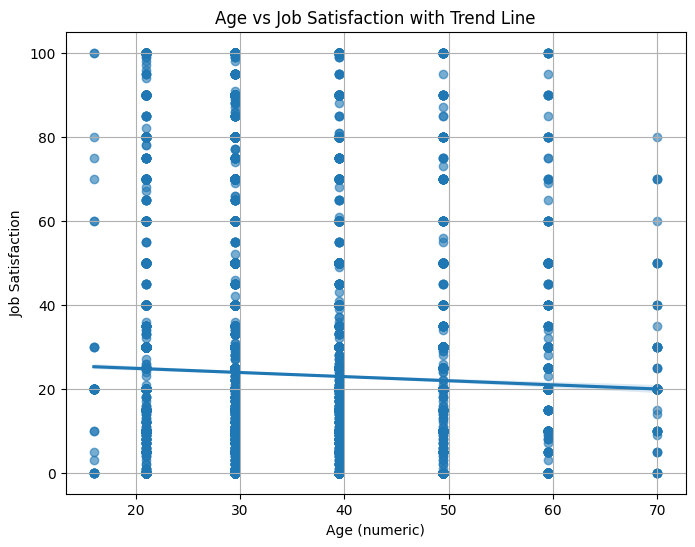

In [10]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.regplot(x='Age_numeric', y='JobSatPoints_6', data=df_clean, scatter_kws={'alpha':0.6})
plt.title('Age vs Job Satisfaction with Trend Line')
plt.xlabel('Age (numeric)')
plt.ylabel('Job Satisfaction')
plt.grid(True)
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


In [11]:
import pandas as pd
import numpy as np

# تحويل YearsCodePro إلى رقم (إذا كان نص)
df['YearsCodePro_numeric'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# تنظيف القيم المفقودة أو غير صالحة
df_clean = df.dropna(subset=['Age_numeric','YearsCodePro_numeric'])

# إزالة القيم الشاذة في الخبرة (مثلاً أقل من 0 أو أكثر من 50 سنة)
df_clean = df_clean[(df_clean['YearsCodePro_numeric'] >= 0) & 
                    (df_clean['YearsCodePro_numeric'] <= 50)]


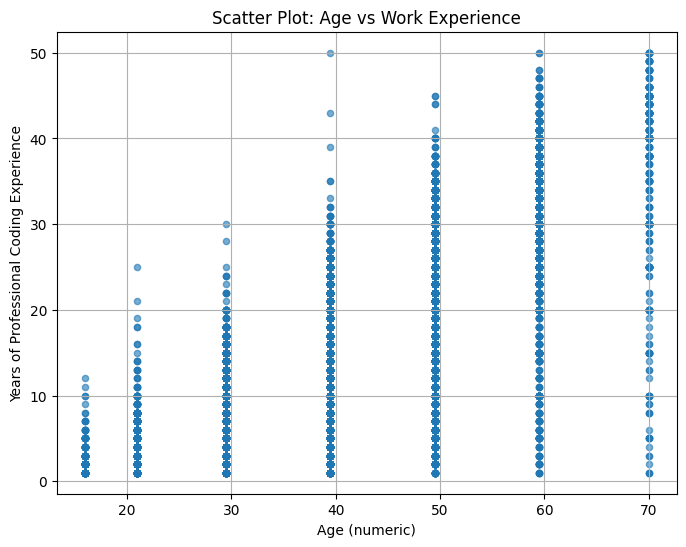

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df_clean['Age_numeric'], df_clean['YearsCodePro_numeric'], alpha=0.6, s=20)
plt.title('Scatter Plot: Age vs Work Experience')
plt.xlabel('Age (numeric)')
plt.ylabel('Years of Professional Coding Experience')
plt.grid(True)
plt.show()


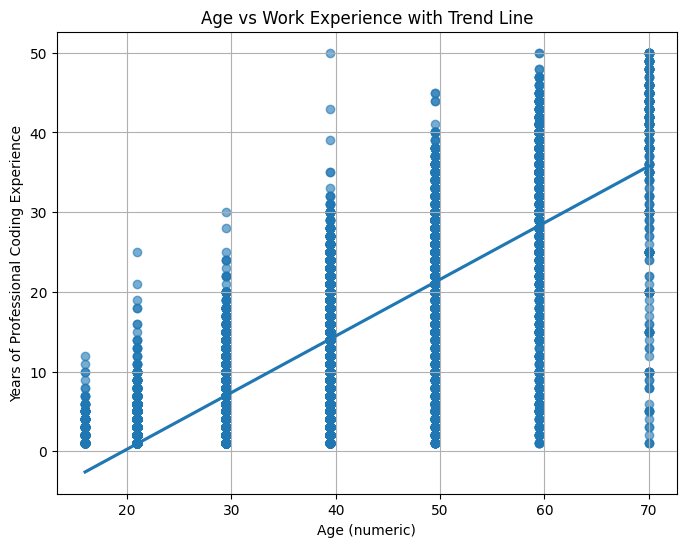

In [13]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(x='Age_numeric', y='YearsCodePro_numeric', data=df_clean, scatter_kws={'alpha':0.6})
plt.title('Age vs Work Experience with Trend Line')
plt.xlabel('Age (numeric)')
plt.ylabel('Years of Professional Coding Experience')
plt.grid(True)
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


In [14]:
import pandas as pd
import numpy as np

# تنظيف القيم المفقودة
median_jobsat = df['JobSatPoints_6'].median()
df['JobSatPoints_6'] = df['JobSatPoints_6'].fillna(median_jobsat)

df_clean = df.dropna(subset=['ConvertedCompYearly','JobSatPoints_6','Age_numeric'])

# إزالة الرواتب الشاذة (أقل من 1000 أو أكثر من 1,000,000 دولار)
df_clean = df_clean[(df_clean['ConvertedCompYearly'] >= 1000) &
                    (df_clean['ConvertedCompYearly'] <= 1_000_000)]


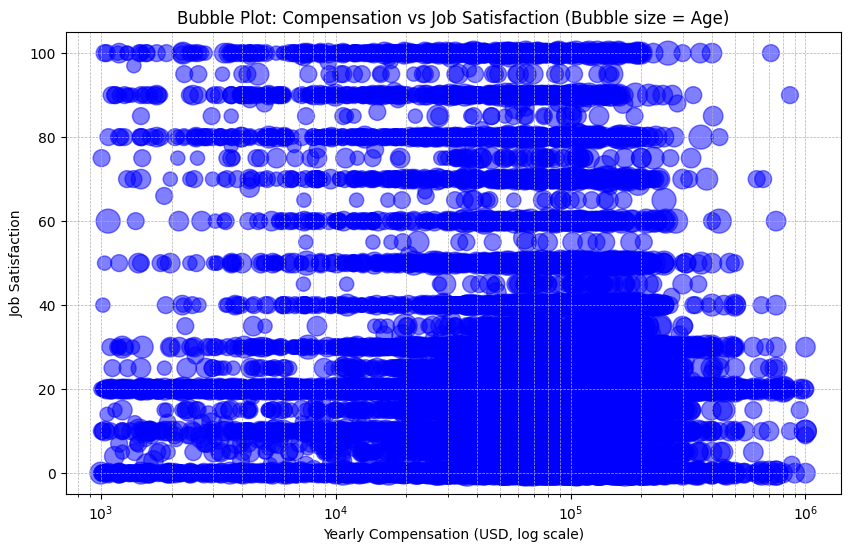

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# ضبط حجم الفقاعات بناءً على العمر (تكبير الحجم قليلاً لوضوح)
sizes = df_clean['Age_numeric'] * 5  # يمكن تعديل العامل حسب الحاجة

plt.scatter(df_clean['ConvertedCompYearly'], 
            df_clean['JobSatPoints_6'], 
            s=sizes, alpha=0.5, color='blue')

plt.xscale('log')  # لتحسين توزيع الرواتب
plt.xlabel('Yearly Compensation (USD, log scale)')
plt.ylabel('Job Satisfaction')
plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble size = Age)')
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [17]:
import pandas as pd


# فصل اللغات بناءً على الفاصل (غالباً ; )
df_lang = df[['LanguageHaveWorkedWith','JobSatPoints_6']].dropna(subset=['LanguageHaveWorkedWith','JobSatPoints_6'])

# إنشاء صف لكل لغة
df_expanded = df_lang.assign(Language=df_lang['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# إزالة المسافات الزائدة
df_expanded['Language'] = df_expanded['Language'].str.strip()


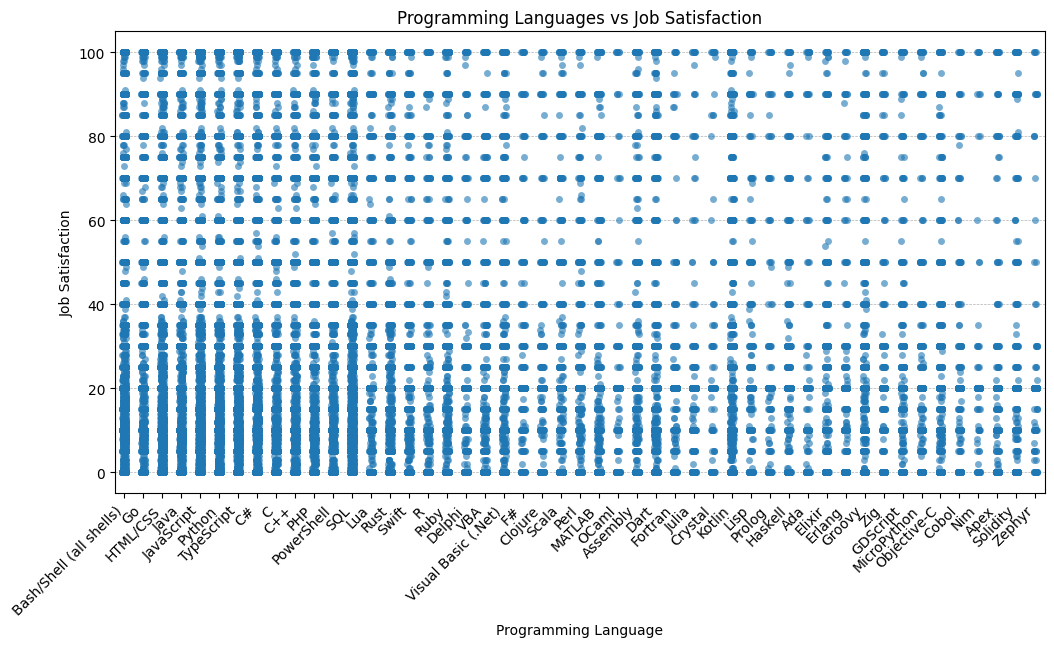

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.stripplot(x='Language', y='JobSatPoints_6', data=df_expanded, jitter=True, alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.title('Programming Languages vs Job Satisfaction')
plt.xlabel('Programming Language')
plt.ylabel('Job Satisfaction')
plt.grid(True, axis='y', ls='--', lw=0.5)
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


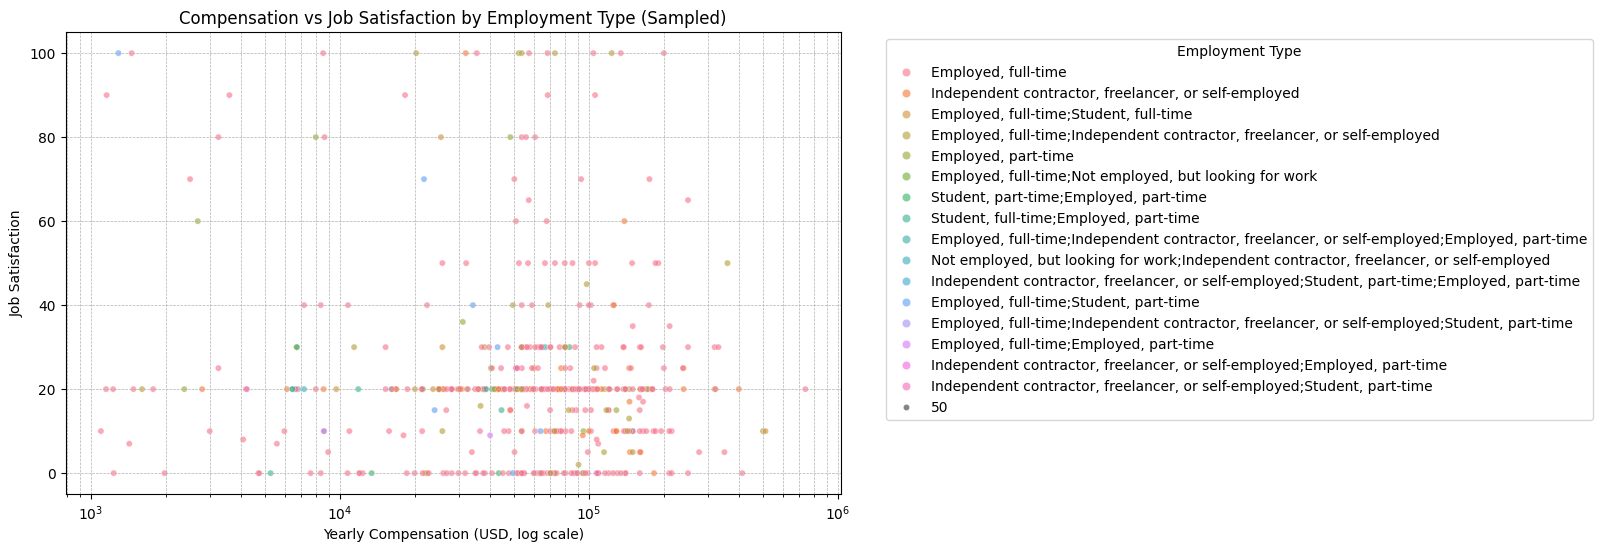

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. تنظيف البيانات ---
median_jobsat = df['JobSatPoints_6'].median()
df['JobSatPoints_6'] = df['JobSatPoints_6'].fillna(median_jobsat)

df_clean = df.dropna(subset=['ConvertedCompYearly','JobSatPoints_6','Employment'])

# إزالة الرواتب الشاذة
df_clean = df_clean[(df_clean['ConvertedCompYearly'] >= 1000) &
                    (df_clean['ConvertedCompYearly'] <= 1_000_000)]

# --- 2. أخذ عينة صغيرة لتقليل التراكب ---
df_sample = df_clean.sample(n=500, random_state=42)

# --- 3. Bubble Plot مع تمييز نوع التوظيف ---
plt.figure(figsize=(10,6))

# يمكن استخدام العمر لتكبير الفقاعات إذا أردت
# sizes = df_sample['Age_numeric'] * 3  # مثال لو العمود موجود
# هنا نستخدم حجم ثابت لتسهيل الرؤية
sizes = 50

sns.scatterplot(x='ConvertedCompYearly', y='JobSatPoints_6',
                hue='Employment', size=sizes,
                sizes=(20, 200), alpha=0.6,
                data=df_sample)

plt.xscale('log')
plt.xlabel('Yearly Compensation (USD, log scale)')
plt.ylabel('Job Satisfaction')
plt.title('Compensation vs Job Satisfaction by Employment Type (Sampled)')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [20]:
import pandas as pd
import numpy as np

# تحويل YearsCodePro إلى رقمي
df['YearsCodePro_numeric'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# تنظيف البيانات من القيم المفقودة
df_clean = df.dropna(subset=['YearsCodePro_numeric','Age_numeric','Country'])

# إزالة القيم الشاذة في الخبرة
df_clean = df_clean[(df_clean['YearsCodePro_numeric'] >= 0) & 
                    (df_clean['YearsCodePro_numeric'] <= 50)]

# أخذ عينة لتقليل ازدحام النقاط (اختياري)
df_sample = df_clean.sample(n=1000, random_state=42)


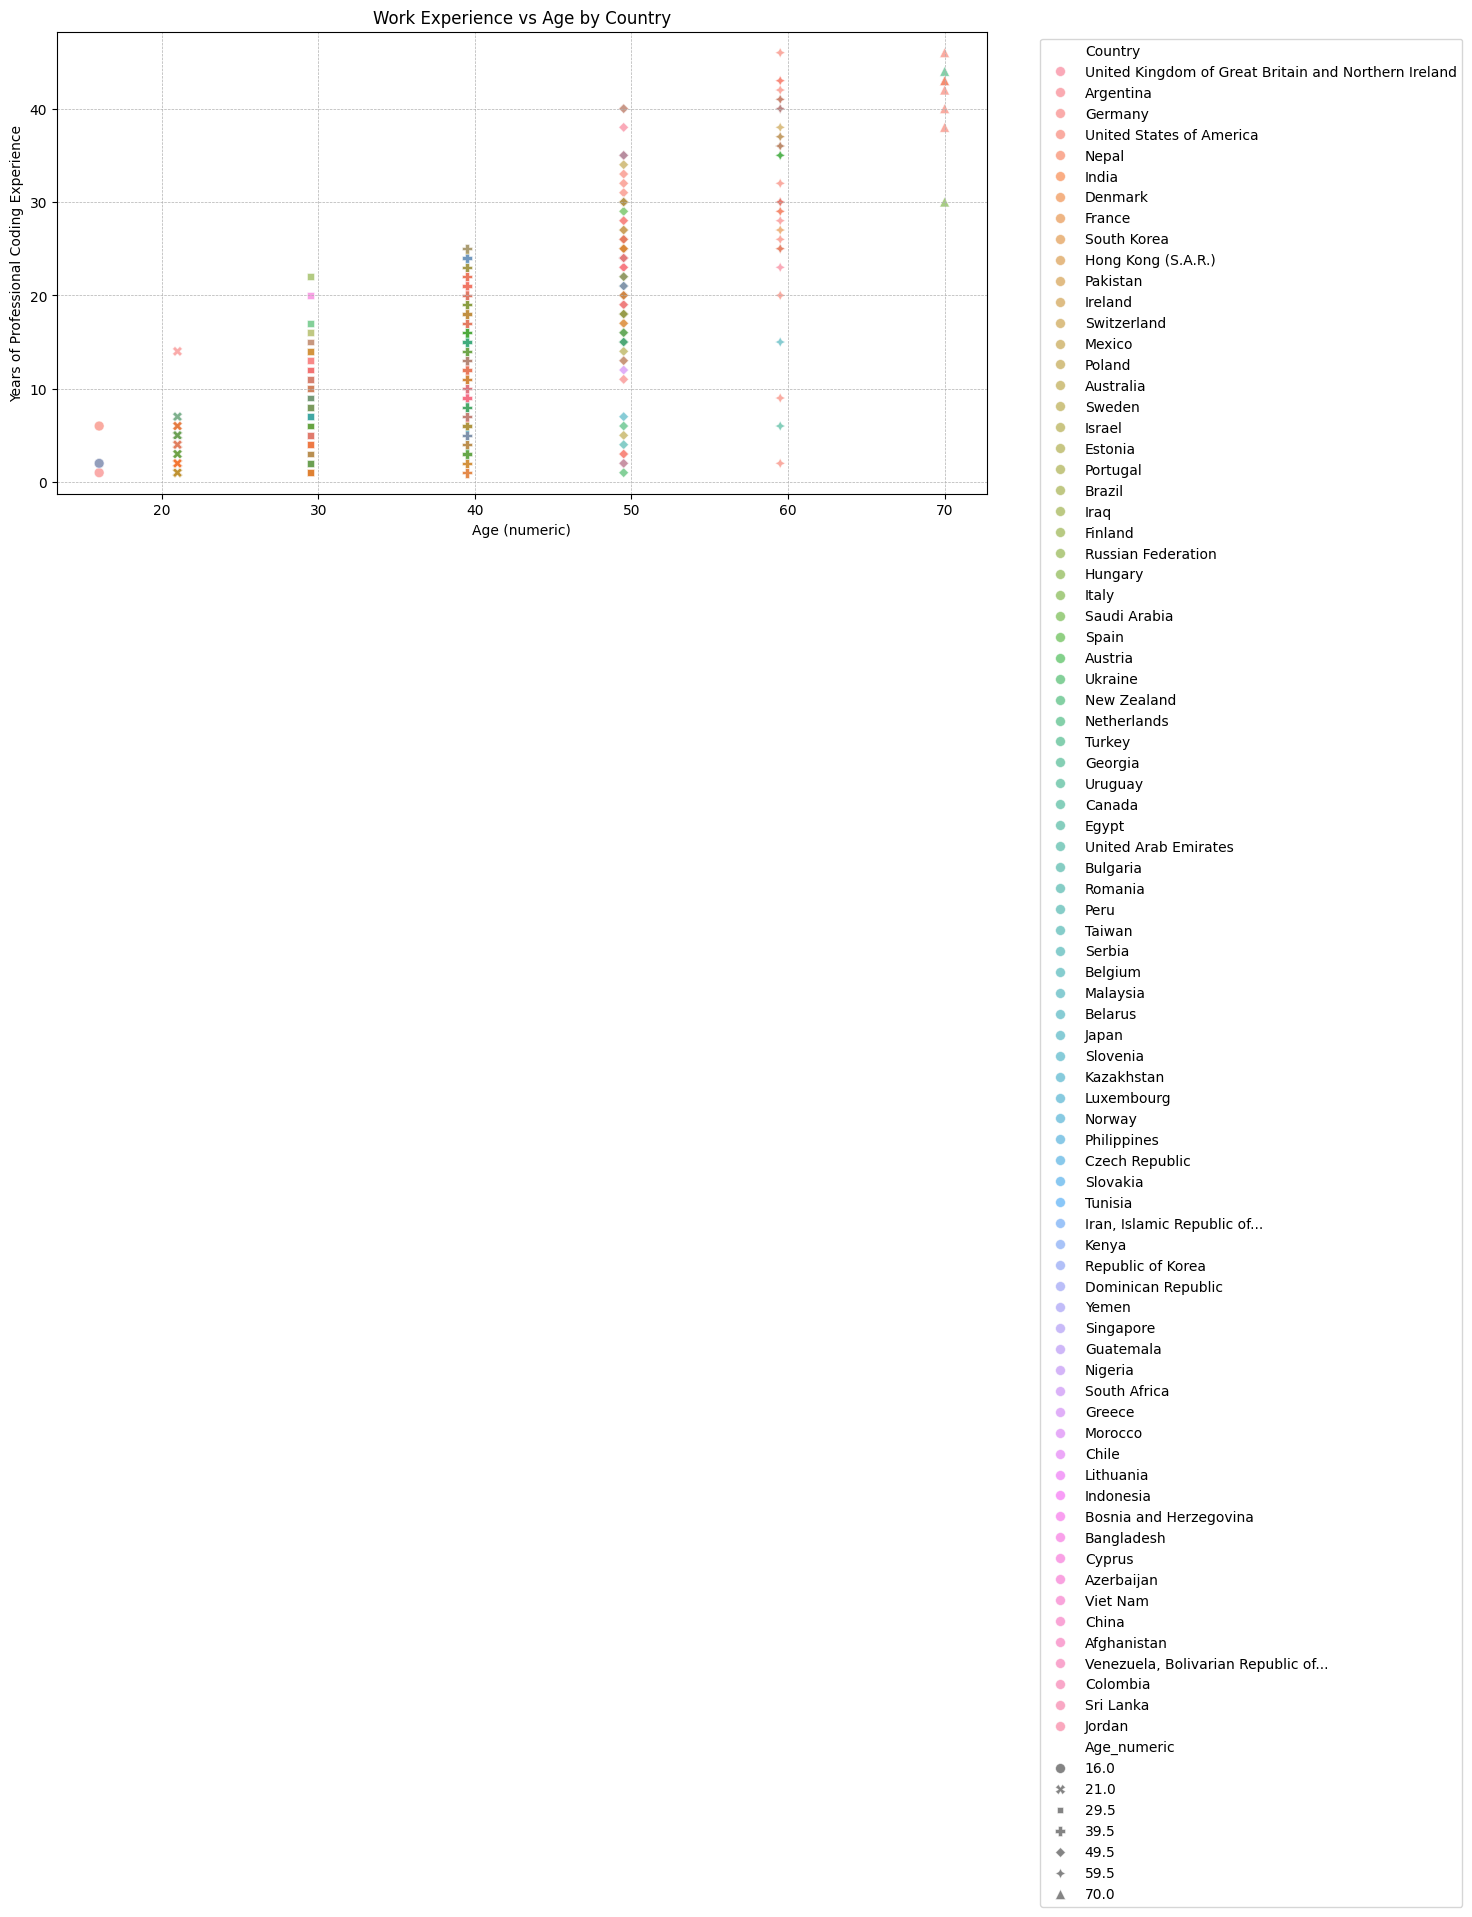

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

sns.scatterplot(x='Age_numeric', 
                y='YearsCodePro_numeric', 
                hue='Country', 
                style='Age_numeric',  # إذا لديك Age Group استخدم العمود
                data=df_sample,
                alpha=0.6,
                s=50)  # حجم النقاط

plt.xlabel('Age (numeric)')
plt.ylabel('Years of Professional Coding Experience')
plt.title('Work Experience vs Age by Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, ls="--", lw=0.5)
plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
